In [28]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from AQ_Data import lade_aver_SO2
daily_averages_SO2 = lade_aver_SO2()

from AQ_Data import lade_aver_month_SO2
monthly_averages_SO2 = lade_aver_month_SO2()

In [29]:
df = monthly_averages_SO2

# Erstellen des Flächendiagramms
fig = px.area(df, x='Start', y='Value', title='Area Chart')
df["Value"] = pd.to_numeric(df["Value"])
df.fillna(1, inplace=True)
# Berechnung der Trendlinie (lineare Regression)
df['StartNumeric'] = pd.to_datetime(df['Start']).view("int64") / 10**9
slope, intercept = np.polyfit(df['StartNumeric'], df['Value'], 1)
# Berechnung der Trendlinienwerte
df['Trend'] = intercept + slope * df['StartNumeric']

fig.add_scatter(x=df['Start'], y=df['Trend'], mode='lines', name='Trendlinie')

fig.show()

In [30]:
df["Value"] = pd.to_numeric(df["Value"])
df['Start'] = pd.to_datetime(df['Start'])

# Gruppieren die Daten nach Jahren
df['Year'] = df['Start'].dt.year

fig = px.area(df, x='Start', y='Value', title='Area Chart')

# Berechnung und Hinzufügen der Trendlinie für jedes Jahr
for year in df['Year'].unique():
    yearly_data = df[df['Year'] == year]
    
    yearly_data['StartNumeric'] = yearly_data['Start'].view("int64") / 10**9
    
    # Berechnen die lineare Regression für das Jahr
    slope, intercept = np.polyfit(yearly_data['StartNumeric'], yearly_data['Value'], 1)
    
    # Berechnung der Trendlinienwerte
    yearly_data['Trend'] = intercept + slope * yearly_data['StartNumeric']
    
    fig.add_scatter(x=yearly_data['Start'], y=yearly_data['Trend'], mode='lines', name=f'Trendlinie {year}')

fig.show()

C:\Users\annak\AppData\Local\Temp\ipykernel_11808\3467597245.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\annak\AppData\Local\Temp\ipykernel_11808\3467597245.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\annak\AppData\Local\Temp\ipykernel_11808\3467597245.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

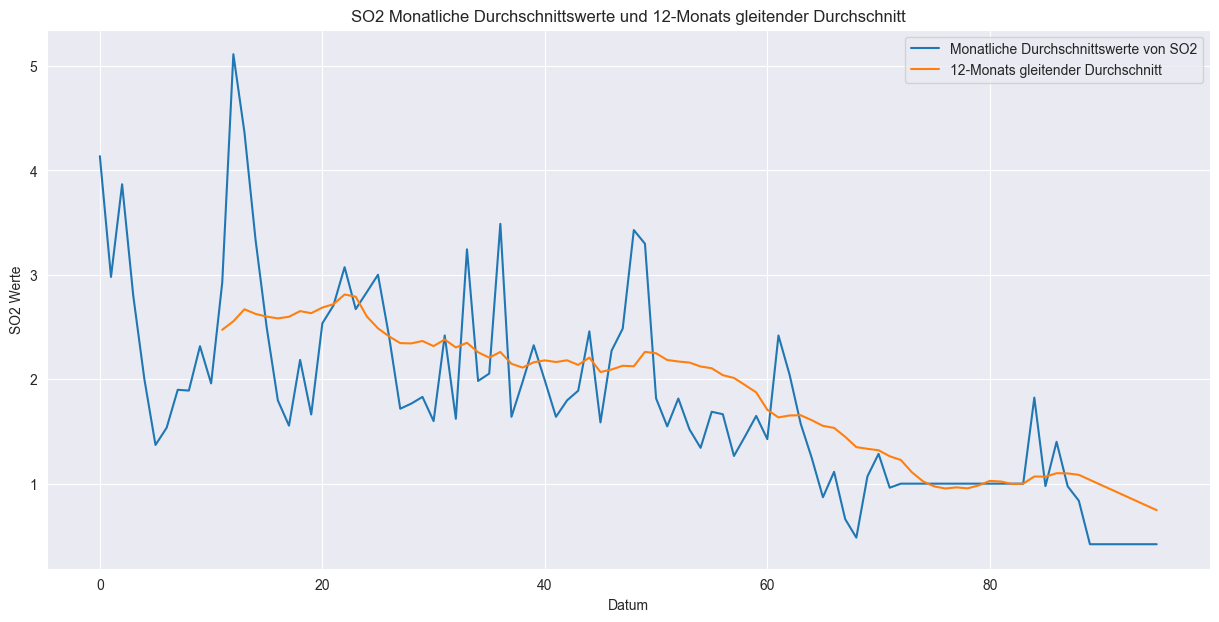

In [31]:
# Gleitenden Durchschnitt

plt.figure(figsize=(15, 7))

plt.plot(monthly_averages_SO2.index, monthly_averages_SO2['Value'], label='Monatliche Durchschnittswerte von SO2')


rolling_window = 12 # Beispiel für ein 12-Monats-Fenster
plt.plot(monthly_averages_SO2['Value'].rolling(window=rolling_window).mean(), label='12-Monats gleitender Durchschnitt')

plt.legend()
plt.title('SO2 Monatliche Durchschnittswerte und 12-Monats gleitender Durchschnitt')
plt.xlabel('Datum')
plt.ylabel('SO2 Werte')

plt.show()


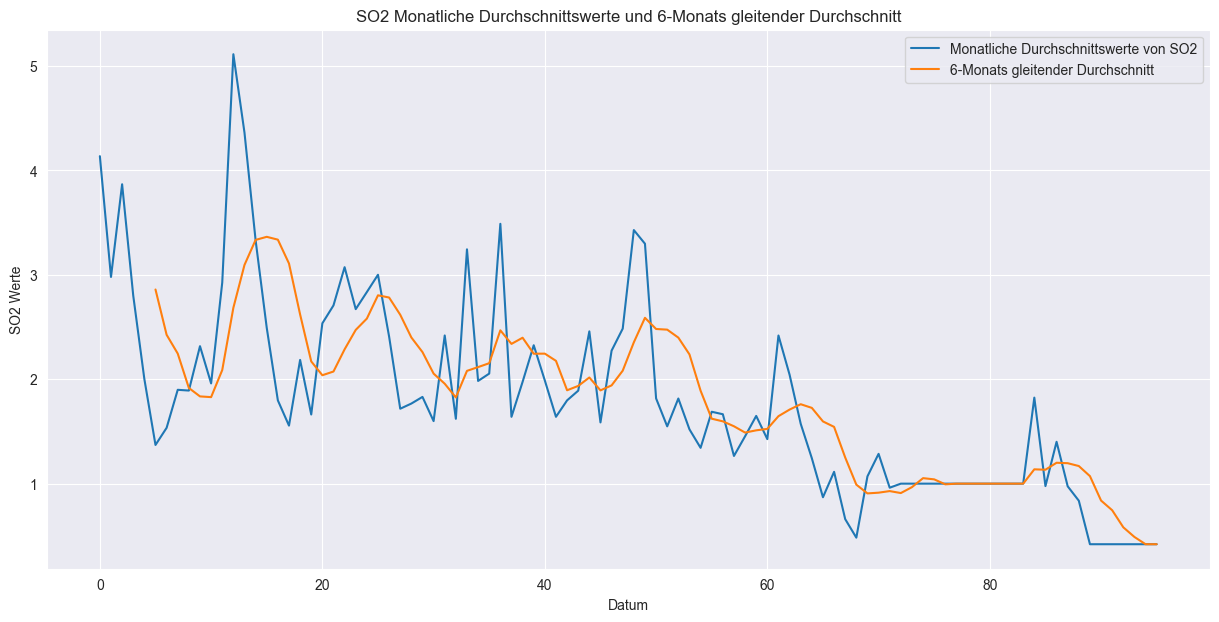

In [32]:
plt.figure(figsize=(15, 7))

plt.plot(monthly_averages_SO2.index, monthly_averages_SO2['Value'], label='Monatliche Durchschnittswerte von SO2')

rolling_window = 6 # Beispiel für ein 6-Monats-Fenster
plt.plot(monthly_averages_SO2['Value'].rolling(window=rolling_window).mean(), label='6-Monats gleitender Durchschnitt')

plt.legend()
plt.title('SO2 Monatliche Durchschnittswerte und 6-Monats gleitender Durchschnitt')
plt.xlabel('Datum')
plt.ylabel('SO2 Werte')

plt.show()